# Mean Squared Error vs Cross Entropy 

In [146]:
%pylab inline
import numpy as np
import tensorflow as tf
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Create Interactive Session

In [2]:
init_op = tf.global_variables_initializer()

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.001, allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(init_op)

## Regression Problem

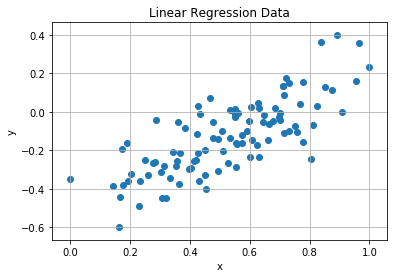

In [363]:
data = np.genfromtxt('../../data/linear-regression/linear-regression.csv', delimiter=',')

# Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

x = data[:, 0]
y = data[:, 1] - 0.6 # negative 값을 만들어서 cross entropy에 부적합하게 만듬
scatter(x, y)
grid()
xlabel('x')
ylabel('y')
title('Linear Regression Data')

In [150]:
def next_batch(x, y, size=10):
    N = x.shape[0]
    idx = np.random.randint(0, N-size)
    return x[idx: idx+size], y[idx: idx+size]

sample_x, sample_y = next_batch(x, y)
print(sample_x.shape, sample_y.shape)

(10,) (10,)


### Regression Model

In [374]:
def mean_squared_error(targets, preds):
    return tf.reduce_mean((targets - preds)**2)

def sigmoid_cross_entropy(targets, preds):
    """
    위의 prediction에서 음수도 나올수 있는데.. 이때 음수를 log에 넣으면 nan이 떠버립니다.
    따라서 sigmoid를 통해서 0~1사이의 값으로 보정을 해줍니다. 
    """
    preds = tf.sigmoid(preds)
    loss = -tf.reduce_sum(targets * tf.log(preds))
    return loss

def sigmmmoid_cross_entropy2(targets, preds):
    return tf.nn.sigmoid_cross_entropy_with_logits(logits=preds, labels=targets)
    
# Select Cost FUnction
cost_function = sigmoid_cross_entropy


# Create Linear Regression Model
input_x = tf.placeholder('float', name='input_x')
input_y = tf.placeholder('float', name='input_y')

w = tf.Variable([-0.85918599], name='weights') # [-0.4775362]
b = tf.Variable(tf.zeros([1]), name='bias') # [ 0.]

pred = tf.add(tf.multiply(input_x, w), b, name='prediction')
cost = cost_function(input_y, pred)
grad = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.5).minimize(cost)

init_op = tf.global_variables_initializer()
sess.run(init_op)

In [357]:
sess.run(w, feed_dict={input_x: x, input_y: y})

array([ 3.13961339], dtype=float32)

### Linear Regression with Cross Entropy

cost nan


InvalidArgumentError: You must feed a value for placeholder tensor 'input_x_96' with dtype float
	 [[Node: input_x_96 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'input_x_96', defined at:
  File "/usr/local/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-374-b086451fe11a>", line 21, in <module>
    input_x = tf.placeholder('float', name='input_x')
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1520, in placeholder
    name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2149, in _placeholder
    name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'input_x_96' with dtype float
	 [[Node: input_x_96 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


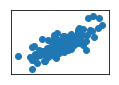

In [377]:
def run():
    for i in range(1, 10):
        for _ in range(i * 4):
            sess.run(grad, feed_dict={input_x: x, input_y: y})
            y_pred, loss = sess.run([pred, cost], feed_dict={input_x: x, input_y: y})

        axes = subplot(3, 3, i)
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(False)

        scatter(x, y)
        plot(x, y_pred, color='red')
        grid()
        axes.grid()

        print('cost', loss)
        print(sess.run(tf.log(pred)), feed_dict={input_x: x, input_y: y})
run()

### Linear Regression with Mean Squared Error

cost 0.0976175
cost 0.0804408
cost 0.060962
cost 0.0436568
cost 0.0308044
cost 0.0226421
cost 0.0181531
cost 0.015999
cost 0.0150926


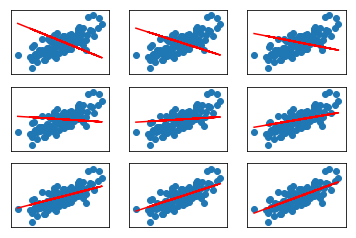

In [370]:
run()